# Goal

The goal of this project is to predict whether a rider will be a generous tipper using a random forest model. This will help the New York City Taxi & Limousine Commission (TLC) understand factors influencing tipping behavior and potentially develop strategies to increase gratuities.

* The purpose of this model is to find ways to generate more revenue for taxi cab drivers.
* The goal of this model is to predict whether or not a customer is a generous tipper.

This activity has three parts:

**Part 1**: Ethical considerations

* Consider the ethical implications of the request
* Should the objective of the model be adjusted?

**Part 2**: Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3**: Modeling

* Build the models, evaluate them, and advise on next steps

# Task 1. Imports and data loading

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import relevant libraries and modules.

import numpy as np
import pandas as pd

# This is the classifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance 
from xgboost import plot_importance

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

# This displays all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# This module lets us save our models once we fit them.
import pickle

In [2]:
# RUN THIS CELL TO SEE ALL COLUMNS 
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

In [3]:
# Load dataset into dataframe
df0 = pd.read_csv('/kaggle/input/yellow-taxi-trip-data-2017/C2_2017_Yellow_Taxi_Trip_Data.csv')
nyc_preds_means = pd.read_csv('/kaggle/input/predicted-fares-and-mean-distance-and-duration/nyc_preds_means.csv')

In [4]:
# Inspect the first few rows of df0
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [5]:
# Inspect the first few rows of `nyc_preds_means`
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


**Join the two dataframes**

Join the two dataframes using a method of your choice.

In [6]:
# Merge datasets
df0 = df0.join(nyc_preds_means)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


# Task 2. Feature engineering

In [7]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

we know from our EDA that customers who pay cash generally have a tip amount of $0. To meet the modeling objective, we'll need to sample the data to select only the customers who pay with credit card.

*Column name* Payment_type

*Description* A numeric code signifying how the passenger paid for the trip. 

1= Credit card 

2= Cash 

3= No charge 

4= Dispute 

5= Unknown 

6= Voided trip

In [8]:
# Create a copy of df0
df1 = df0.copy()

# Filter for credit card payments
df1 = df1[df1['payment_type'] == 1]

**Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it.

Add a tip_percent column to the dataframe by performing the following calculation:


> 𝑡𝑖𝑝 𝑝𝑒𝑟𝑐𝑒𝑛𝑡 = 𝑡𝑖𝑝 𝑎𝑚𝑜𝑢𝑛𝑡 / (𝑡𝑜𝑡𝑎𝑙 𝑎𝑚𝑜𝑢𝑛𝑡−𝑡𝑖𝑝 𝑎𝑚𝑜𝑢𝑛𝑡)

Round the result to three places beyond the decimal. This is an important step. It affects how many customers are labeled as generous tippers.

In [9]:
# Calculate tip percentage
df1['tip_percent'] = (df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount'])) * 100

# Round to three decimal places
df1['tip_percent'] = df1['tip_percent'].round(3)

Create another column called generous. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

1. Begin by making the generous column a copy of the tip_percent column.
1. Reassign the column by converting it to Boolean (True/False).
1. Reassign the column by converting Boolean to binary (1/0).

In [10]:
# Create a copy of tip_percent
df1['generous'] = df1['tip_percent'].copy()

# Convert to Boolean
df1['generous'] = df1['generous'] >= 20

# Convert Boolean to binary
df1['generous'] = df1['generous'].astype(int)

**Create day column**

Working with the pickup and dropoff columns.

Convert the *tpep_pickup_datetime* and *tpep_dropoff_datetime* columns to datetime.

In [11]:
# Check the format of the data tpep_pickup_datetime
df1['tpep_pickup_datetime'][0]

'03/25/2017 8:55:43 AM'

In [12]:
# Check the format of the data tpep_dropoff_datetime
df1['tpep_dropoff_datetime'][0]

'03/25/2017 9:09:47 AM'

In [13]:
# Convert pickup and dropoff cols to datetime

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df1['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df1['tpep_dropoff_datetime'].dtype)

# Convert `tpep_pickup_datetime` to datetime format
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'],format='%m/%d/%Y %I:%M:%S %p')

# Convert `tpep_dropoff_datetime` to datetime format
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'],format='%m/%d/%Y %I:%M:%S %p')

# Display data types of `tpep_pickup_datetime`, `tpep_dropoff_datetime`
print('Data type of tpep_pickup_datetime:', df1['tpep_pickup_datetime'].dtype)
print('Data type of tpep_dropoff_datetime:', df1['tpep_dropoff_datetime'].dtype)

df1.head(3)

Data type of tpep_pickup_datetime: object
Data type of tpep_dropoff_datetime: object
Data type of tpep_pickup_datetime: datetime64[ns]
Data type of tpep_dropoff_datetime: datetime64[ns]


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,20.000,1
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,23.810,1
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,19.863,0


Create a day column that contains only the day of the week when each passenger was picked up. Then, convert the values to lowercase.

In [14]:
# Extract the day of the week from tpep_pickup_datetime
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()

# Convert to lowercase
df1['day'] = df1['day'].str.lower()

**Create time of day columns**

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

* am_rush = [06:00–10:00)
* daytime = [10:00–16:00)
* pm_rush = [16:00–20:00)
* nighttime = [20:00–06:00)

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the *tpep_pickup_datetime* column.

In [15]:
# Create 'am_rush' col
df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'daytime' col
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'pm_rush' col
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour

# Create 'nighttime' col
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

In [16]:
# Define 'am_rush()' conversion function [06:00–10:00)

# Function to convert am_rush to binary
def am_rush_binary(hour):
    if 6 <= hour < 10:
        return 1
    else:
        return 0

# Apply the function to the am_rush column
df1['am_rush'] = df1['am_rush'].apply(am_rush_binary)
# Print the first five values
print(df1['am_rush'].head())

0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64


In [17]:
# Define 'daytime()' conversion function [10:00–16:00)
def daytime_binary(hour):
    if 10 <= hour < 16:
        return 1
    else:
        return 0
    
# Apply 'daytime()' function to the 'daytime' series
df1['daytime'] = df1['daytime'].apply(daytime_binary)
# Print the first five values
print(df1['daytime'].head())

0    0
1    1
2    0
3    1
5    0
Name: daytime, dtype: int64


In [18]:
# Define 'pm_rush()' conversion function [16:00–20:00)
def pm_rush_binary(hour):
    if 16 <= hour < 20:
        return 1
    else:
        return 0
# Apply 'pm_rush()' function to the 'pm_rush' series
df1['pm_rush'] = df1['pm_rush'].apply(pm_rush_binary)
# Print the first five values
print(df1['pm_rush'].head())

0    0
1    0
2    0
3    0
5    0
Name: pm_rush, dtype: int64


In [19]:
# Define 'nighttime()' conversion function [20:00–06:00)
def nighttime_binary(hour):
    if 20 <= hour < 6:
        return 1
    else:
        return 0
# Apply 'nighttime' function to the 'nighttime' series
df1['nighttime'] = df1['nighttime'].apply(nighttime_binary)
# Print the first five values
print(df1['nighttime'].head())

0    0
1    0
2    0
3    0
5    0
Name: nighttime, dtype: int64


**Create month column**

In [20]:
# Create 'month' col
# Extract the month name from tpep_pickup_datetime
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b')

# Convert to lowercase
df1['month'] = df1['month'].str.lower()
print(df1['month'].head(5))

0    mar
1    apr
2    dec
3    may
5    mar
Name: month, dtype: object


**Drop columns**

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (generous) must remain in the data because it will get isolated as the y data for modeling.

In [21]:
df1.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,20.000,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,23.810,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,19.863,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,30.000,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,20.000,1,saturday,0,0,0,0,mar


In [22]:
# Drop columns
# List of columns to drop
columns_to_drop = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

# Drop the columns
df1 = df1.drop(columns=columns_to_drop)

df1.head(5)

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,mean_duration,mean_distance,predicted_fare,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,2,6,1,100,231,22.847222,3.521667,16.434245,1,saturday,1,0,0,0,mar
1,1,1,1,186,43,24.470370,3.108889,16.052218,1,tuesday,0,1,0,0,apr
2,1,1,1,262,236,7.250000,0.881429,7.053706,0,friday,1,0,0,0,dec
3,2,1,1,188,97,30.250000,3.700000,18.731650,1,sunday,0,1,0,0,may
5,2,6,1,161,236,11.855376,2.052258,10.441351,1,saturday,0,0,0,0,mar


**Variable encoding**

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as RatecodeID and the pickup and dropoff locations. To make these columns recognizable to the get_dummies() function as categorical variables, you'll first need to convert them to type(str).

In [23]:
# 1. Define list of cols to convert to string
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID']

# 2. Convert each column to string
for col in cols_to_str:
    df1[col] = df1[col].astype(str)

In [24]:
# Convert categoricals to binary
df2 = pd.get_dummies(df1, drop_first=True)

**Evaluation metric**

In [25]:
# Count the occurrences of each class
class_counts = df2['generous'].value_counts()

# Calculate proportions
class_proportions = class_counts / len(df2)

print("Class balance:")
print(class_proportions)

Class balance:
generous
0    0.519424
1    0.480576
Name: count, dtype: float64


A little over half of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is very nearly balanced.

To determine a metric, consider the cost of both kinds of model error:

* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more—even when the original customer would have tipped generously.

# Task 3. Modeling

**Split the data**

The only remaining step is to split the data into features/target variable and training/testing data.

In [26]:
# Isolate target variable (y)
y = df2['generous']

# Isolate the features (X)
X = df2.drop(columns=['generous'])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Random **forest**

In [27]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=42)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {'max_depth': [None],
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [2],
             'n_estimators': [300]
             }
# 3. Define a set of scoring metrics to capture
scoring = ['precision', 'recall', 'f1', 'accuracy']

# 4. Instantiate the GridSearchCV object
rf1 = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=5, refit='f1')


Fit the model to the training data.

In [28]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 5min 48s, sys: 309 ms, total: 5min 48s
Wall time: 5min 48s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='f1', scoring=['precision', 'recall', 'f1', 'accuracy'])

**Save the model for reference using pickle**

Use the pickle library you've already imported to save the output of this model.

In [29]:
import pickle 

# Define a path to the folder where you want to save the model
path = '/home/jovyan/work/'

In [30]:
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [31]:
def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model

Examine the best average score across all the validation folds.

In [32]:
# Examine best score
rf1.best_score_

0.6945681934367212

Examine the best combination of hyperparameters.

In [33]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [34]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table

In [35]:
# Call 'make_results()' on the GridSearch object
results = make_results('RF CV', rf1, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674792,0.715622,0.694568,0.697593


Use your model to predict on the test data. Assign the results to a variable called rf_preds.

In [36]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

In [37]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

**RF test results**

In [38]:
# Get scores on test data
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674792,0.715622,0.694568,0.697593
0,RF test,0.670878,0.723926,0.696393,0.696692


**XGBoost**

In [39]:
# 1. Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# 2. Create a dictionary of hyperparameters to tune
# Note that this example only contains 1 value for each parameter for simplicity,
# but you should assign a dictionary with ranges of values
cv_params = {'learning_rate': [0.1],
             'max_depth': [8],
             'min_child_weight': [2],
             'n_estimators': [500]
             }

# 3. Define a set of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='f1')

In [40]:
%%time
xgb1.fit(X_train, y_train)

CPU times: user 1min 44s, sys: 431 ms, total: 1min 44s
Wall time: 29.1 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [8],
                         'min_child_weight': [2], 'n_estimators': [500]},
             refit='f1', scoring={'accuracy', 'precision', 'f1', 'recall'})

Get the best score from this model.

In [41]:
# Examine best score
xgb1.best_score_

0.6763753616973366

And the best parameters.

In [42]:
# Examine best parameters
xgb1.best_params_

{'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 500}

**XGB CV results**

In [43]:
# Call 'make_results()' on the GridSearch object
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674792,0.715622,0.694568,0.697593
0,RF test,0.670878,0.723926,0.696393,0.696692
0,XGB CV,0.665553,0.687683,0.676375,0.683754


In [44]:
# Get scores on test data
xgb_preds = xgb1.best_estimator_.predict(X_test)

**XGB test results**

In [45]:
# Get scores on test data
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.674792,0.715622,0.694568,0.697593
0,RF test,0.670878,0.723926,0.696393,0.696692
0,XGB CV,0.665553,0.687683,0.676375,0.683754
0,XGB test,0.671383,0.711656,0.690933,0.694071


Plot a confusion matrix of the champion model's predictions on the test data.

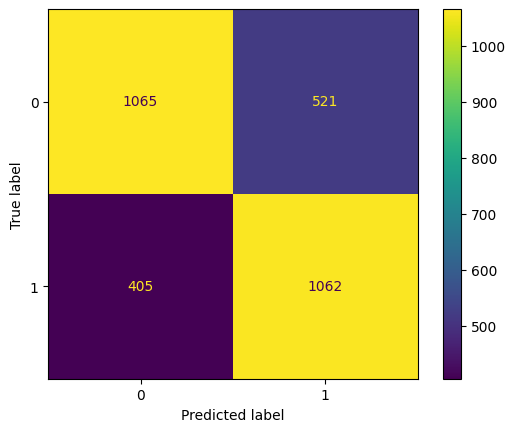

In [46]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');

The model is almost twice as likely to predict a false positive than it is to predict a false negative. Therefore, type I errors are more common. This is less desirable, because it's better for a driver to be pleasantly surprised by a generous tip when they weren't expecting one than to be disappointed by a low tip when they were expecting a generous one. However, the overall performance of this model is satisfactory.

**Feature importance**

The `feature_importances_` attribute of the best estimator object to inspect the features of your final model.

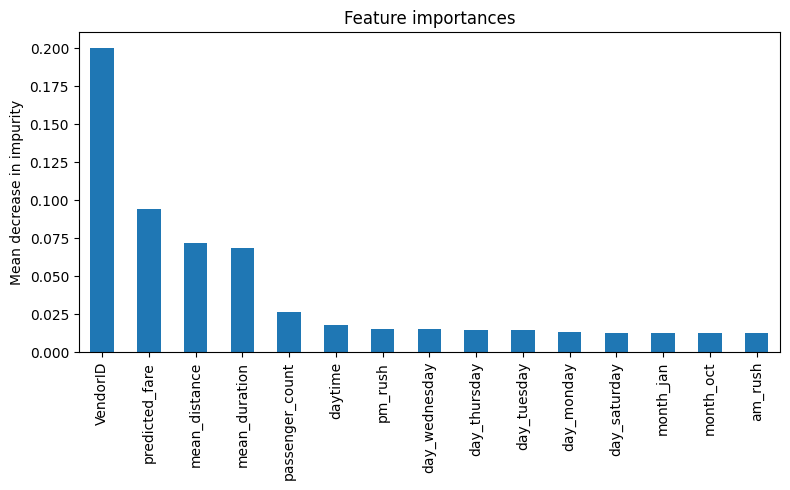

In [47]:
importances = rf1.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns)
rf_importances = rf_importances.sort_values(ascending=False)[:15]

fig, ax = plt.subplots(figsize=(8,5))
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout();